# Importing the library:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the dataset:

In [3]:
data1 = pd.read_csv('C:/Users/dell/Downloads/dataset/sms detection/spam.csv', encoding='ISO-8859-1')

In [4]:
data1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data1.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# Exploratory Data Analysis:

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data1.dtypes.value_counts()

object    5
dtype: int64

In [9]:
data1.shape

(5572, 5)

In [10]:
# Checking the null values in the dataset:

data1.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
# Dropping last 3 columns

data1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
data1.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Label Encoder is used on "v1" to categorize ham as 0 and spam as 1

In [13]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [14]:
data1['v1'] = enc.fit_transform(data1['v1'])

In [15]:
data1.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Renaming the columns

data1.rename(columns={'v1': 'Spam:1/Ham:0','v2': 'Texts'},inplace=True)
data1.sample(5)

,Spam:1/Ham:0,Texts
3026,0,You still at the game?
3062,1,"Hi babe its Jordan, how r u? Im home from abro..."
2148,0,I will once i get home
1931,0,What pa tell me.. I went to bath:-)
2904,0,Ha. You donÛ÷t know either. I did a a clever ...


In [17]:
data1['Spam:1/Ham:0'].value_counts()

0    4825
1     747
Name: Spam:1/Ham:0, dtype: int64

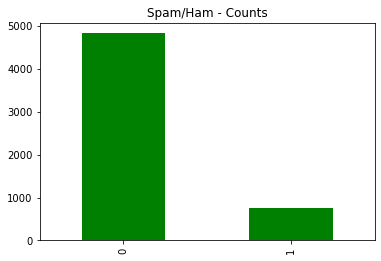

In [19]:
plot = data1['Spam:1/Ham:0'].value_counts().plot.bar(title='Spam/Ham - Counts', color = 'green')

There are 4825 ham messages and 747 spam messages.

In [20]:
print('Number of Duplicate Values in the dataset',data1.duplicated().sum())

Number of Duplicate Values in the dataset 403


In [21]:
data1.drop_duplicates(inplace=True)

In [22]:
print('Number of Duplicate Values in the dataset after dropping',data1.duplicated().sum())

Number of Duplicate Values in the dataset after dropping 0


In [23]:
data1.isnull().sum()

Spam:1/Ham:0    0
Texts           0
dtype: int64

In [24]:
data1.shape

(5169, 2)

In [25]:
data1['Spam:1/Ham:0'].value_counts()

0    4516
1     653
Name: Spam:1/Ham:0, dtype: int64

In [26]:
X = data1['Texts'].values
y = data1['Spam:1/Ham:0'].values

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [28]:
# Checking the Dimensions of Training and Testing Data
print("The Shape of X_train dataset:", X_train.shape)
print("The Shape of X_Test dataset:", X_test.shape)
print("The Shape of Y_Train dataset:", y_train.shape)
print("The Shape of Y_Test dataset:", y_test.shape)

The Shape of X_train dataset: (4135,)
The Shape of X_Test dataset: (1034,)
The Shape of Y_Train dataset: (4135,)
The Shape of Y_Test dataset: (1034,)


# Preprocessing

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)

In [31]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
len(X_train.toarray()[0])

7594

In [33]:
len(X_train.toarray())

4135

# ML Algorithm

In [34]:
from sklearn.naive_bayes import MultinomialNB

mul_nb = MultinomialNB()

In [35]:
mul_nb.fit(X_train, y_train)

MultinomialNB()

In [36]:
X_test = vect.transform(X_test)

In [37]:
len(X_test.toarray())

1034

In [38]:
len(X_test.toarray()[0])

7594

In [39]:
pred = mul_nb.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

print("Accuracy on Testing")
accuracy_score(pred, y_test)

Accuracy on Testing


0.9816247582205029

# Testing the Model Created: 

In [41]:
test_email = ['What year. And how many miles.']

In [42]:
clean_test_email = vect.transform(test_email)

In [43]:
len(clean_test_email.toarray()[0])

7594

In [44]:
find = mul_nb.predict(clean_test_email)[0]

In [45]:
find

0

Test_email is given and transformed and found to be 0 (Ham).

# Evaluation:

In [46]:
sample_email = ['Free Tickets for IPL']

clean_sample_email = vect.transform(sample_email)
finds = mul_nb.predict(clean_sample_email)[0]

if finds == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!


Finally the model works correctly.